# Example showing how to characterize the cross-talk effect in LinoSPAD2.

This example demonstrates how to characterize cross-talk (CT) in LinoSPAD2. Data for cross-talk analysis can come from various sources: noise only, ambient light, or a signal from a thermal light source (e.g., a neon or argon lamp) or even an LED. Cross-talk is an inherent property of the LinoSPAD2 sensor and is determined by the SPAD-to-SPAD isolation, size, and characteristics of each pixel. Theoretically, there could be a dependence on the wavelength of the primary (signal) photons, but there should be no dependence on temperature.

Cross-talk analysis involves comparing all timestamps from two pixels to identify pairs of the closest timestamps, where one timestamp originates from one pixel (signal/primary photon) and the second occurs shortly after from another pixel (cross-talk/secondary photon). If a noticeable cross-talk effect exists between the two analyzed pixels, a peak will appear in the timestamp coincidence histogram ($\Delta t$). The population of these cross-talk peaks within a $\pm2\sigma$ window is collected, and the background within the same window is subtracted to isolate cross-talk coincidences. The result is then divided by the sum of timestamps from both pixels to calculate the cross-talk probability. Cross-talk has been observed to propagate up to 20 pixels from the aggressor (the emitter of cross-talk photons), so coincidences are calculated for the aggressor and its 20 neighboring pixels on each side. The cross-talk probability is averaged over all pixels included in the analysis.

To begin the analysis, first import the necessary libraries and define the absolute path to the folder containing the '.dat' data files.

In [ ]:
from daplis.functions import cross_talk

path = r"/home/lada/Desktop/LinoSPAD2/Data/CT_beam"

Now, calculate timestamp differences for the pixels of interest (provded via the "pixels" parameter) and 20 neighbors to each side from. The result is saved in the 'cross_talk_data' folder at the same location where '.dat' data files are located.

In [6]:
cross_talk.zero_to_cross_talk_collect(
    path,
    pixels=[70],
    rewrite=True,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=1000,
)


> > > Collecting cross-talk data < < <



Calculating timestamp differences between aggressor pixel 70 and pixels to the right



> > > Timestamp differences are saved as0000029100-0000029399_pixels_70-90.feather in /home/lada/Desktop/LinoSPAD2/Data/CT_beam/cross_talk_data < < <
Calculating timestamp differences between aggressor pixel 70 and pixels to the left



> > > Timestamp differences are saved as0000029100-0000029399_pixels_70-50.feather in /home/lada/Desktop/LinoSPAD2/Data/CT_beam/cross_talk_data < < <


After collecting the timestamp differences, the CT peaks, the average cross-talk probability vs distance from the hot pixel for each pair of aggressor-victim pixels, and the average CT probability for the whole sensor half can be plotted. 

Also, the '.pkl' of average-CT plots is created which can be later used for detailed analysis.


> > > Plotting cross-talk peaks and averages < < <



({1: (0.1357693583781011, 0.0003540872678204186),
  2: (0.025091747177458594, 0.0001533596145360365),
  3: (0.02439685768475114, 0.00015050562289575486),
  4: (0.008838351413908372, 9.075935726000058e-05),
  5: (0.004842456467150497, 6.71392855731035e-05),
  6: (0.0018066735063111225, 4.1195631358838516e-05),
  7: (0.0015072769297038082, 3.785904723470083e-05),
  8: (0.0016435741174494283, 3.951463712498905e-05),
  9: (0.0017325803945128248, 4.0460534267826386e-05),
  10: (0.0014823862563330282, 3.732539325821644e-05),
  11: (0.0009122823586864972, 2.937657128786242e-05),
  12: (0.0005998502454503099, 2.376409465219968e-05),
  13: (0.0004292676544022673, 2.0249123176609844e-05),
  14: (0.00033462748648758773, 1.8234943014314984e-05),
  15: (0.00027351907502586075, 1.6351054067142443e-05),
  16: (0.00026981486366447864, 1.6192831621375256e-05),
  17: (0.0002039848514575546, 1.4183491017294522e-05),
  18: (0.00019563322767122293, 1.3595005993885445e-05),
  19: (0.0001585481361600961, 1.2

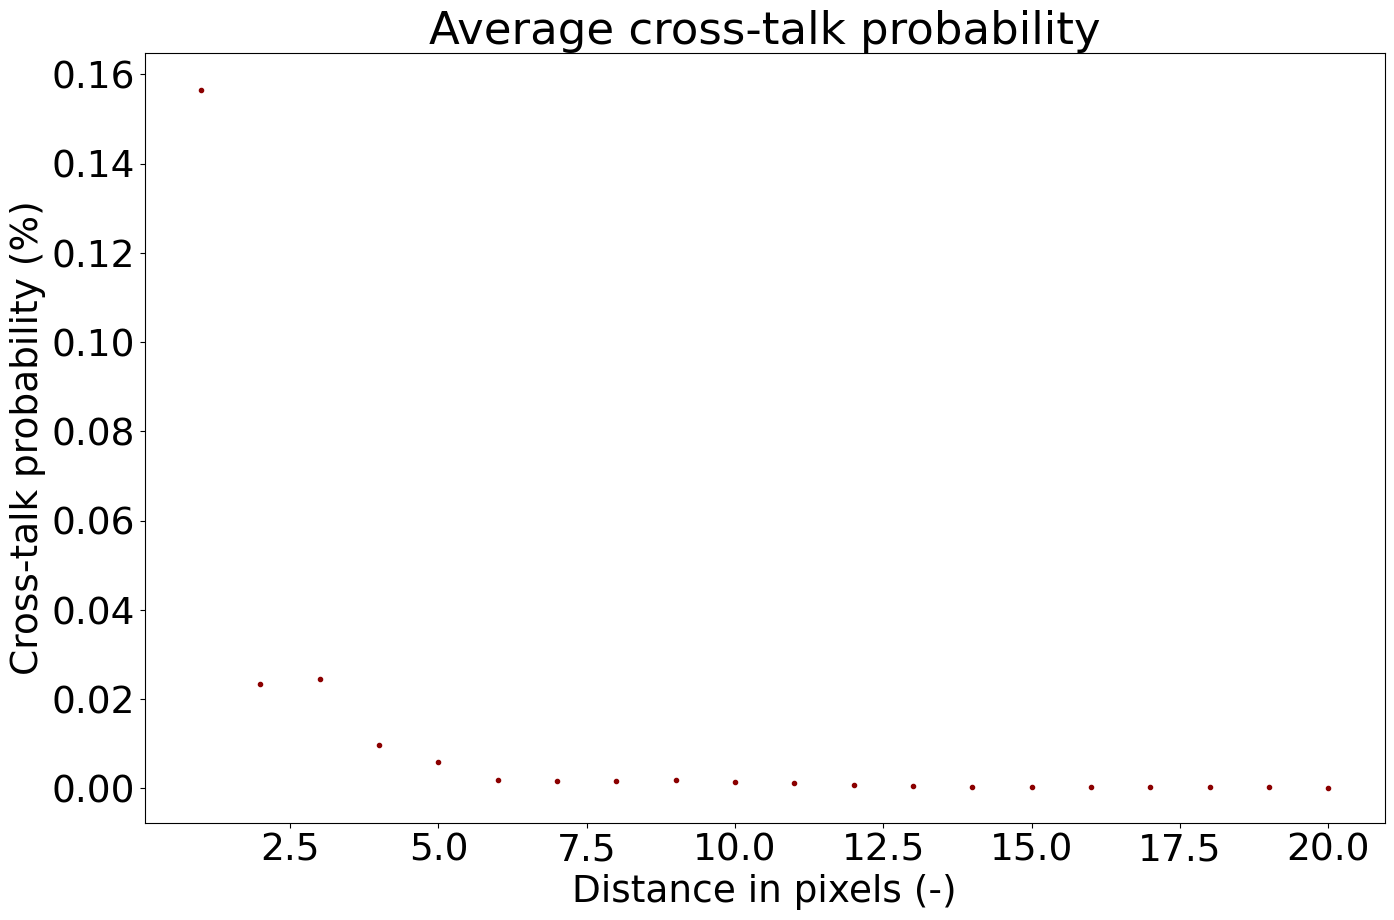

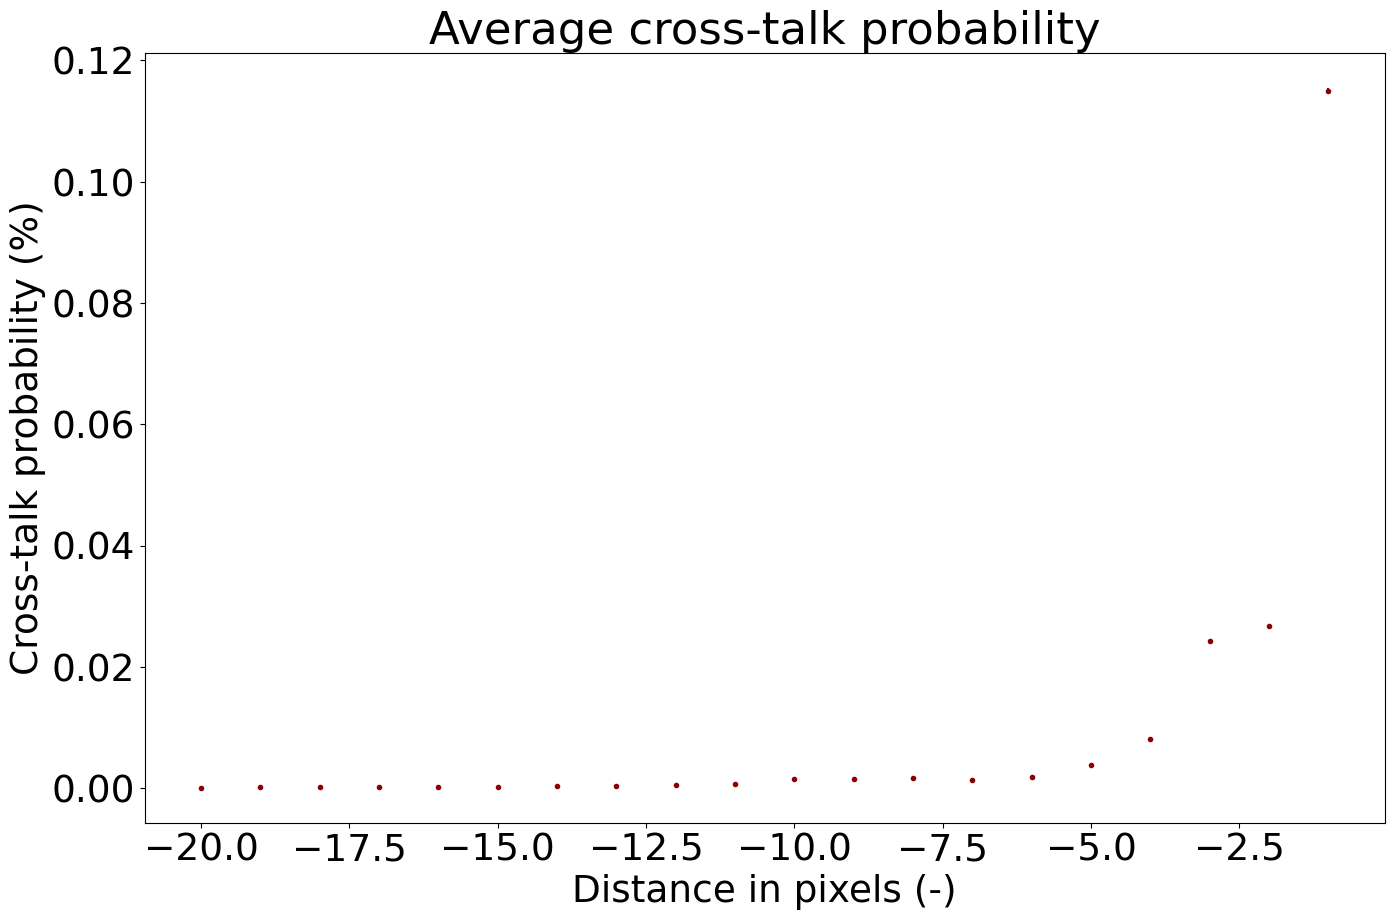

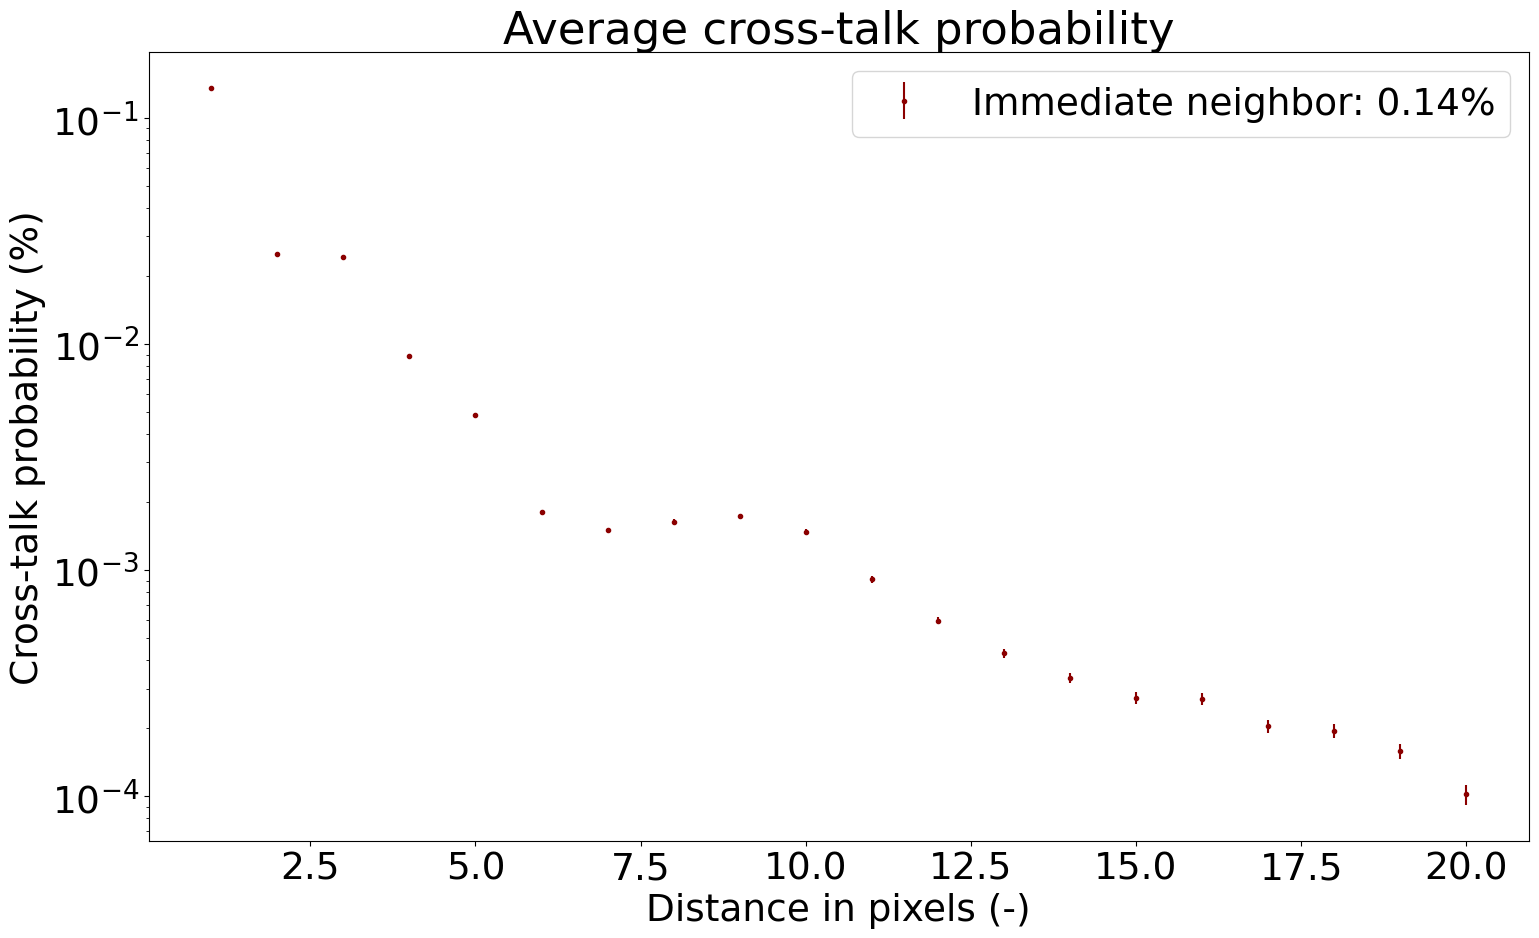

In [7]:
cross_talk.zero_to_cross_talk_plot(
    path,
    pixels=[70],
)

The first two plots show the average cross-talk probability for victim pixels to each side of the aggressor, and the final plot is the average over all pixels provided (only one in this case) and both sides relative to the aggressor.